1.1 Probability of injury: 0.617
1.2 Probability of being a forward or a winger: 0.523
1.3 Probability of being a striker and injured: 0.191
1.4 Probability of being a striker given injury: 0.310
---------------------------------------------------------------------------
2.1 Proportion with breaking strength less than 3.17 kg/cm^2: 0.111
2.2 Proportion with breaking strength at least 3.6 kg/cm^2: 0.825
2.3 Proportion with breaking strength between 5 and 5.5 kg/cm^2: 0.131
2.4 Proportion with breaking strength NOT between 3 and 7.5 kg/cm^2: 0.139


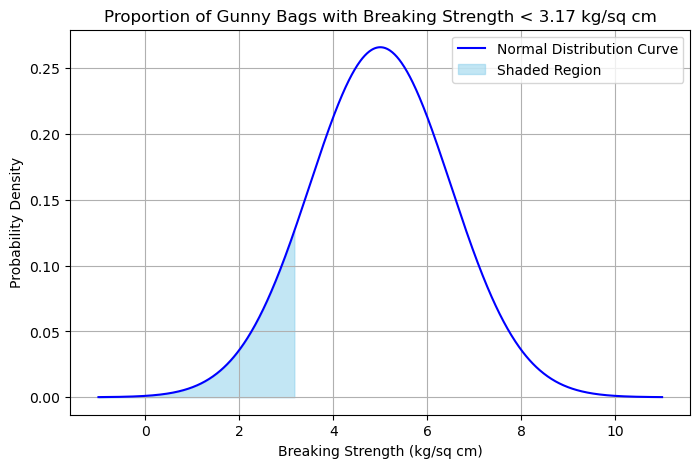

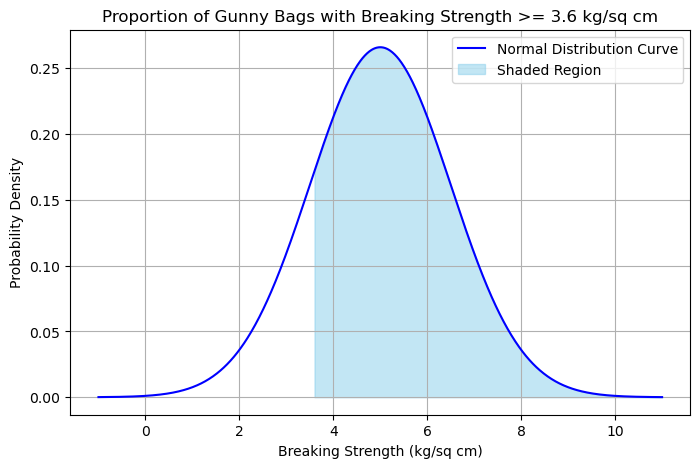

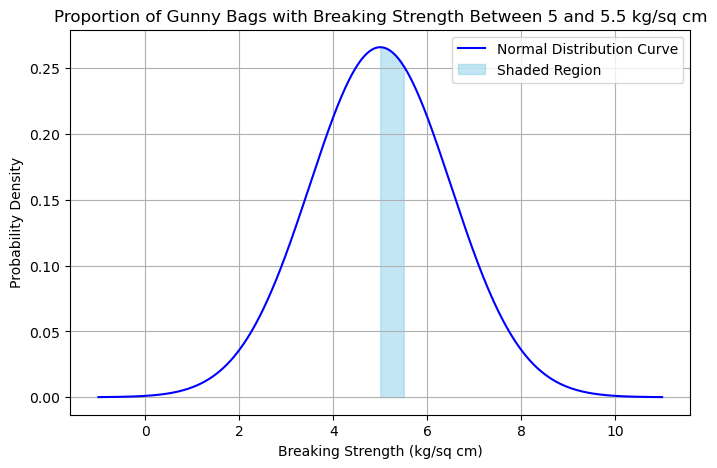

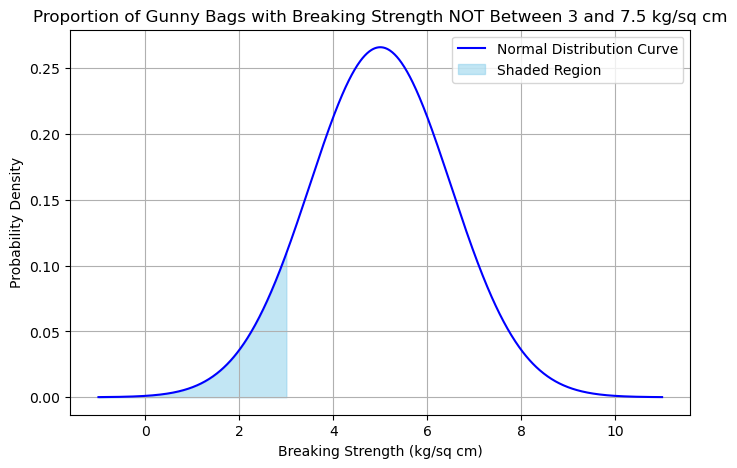

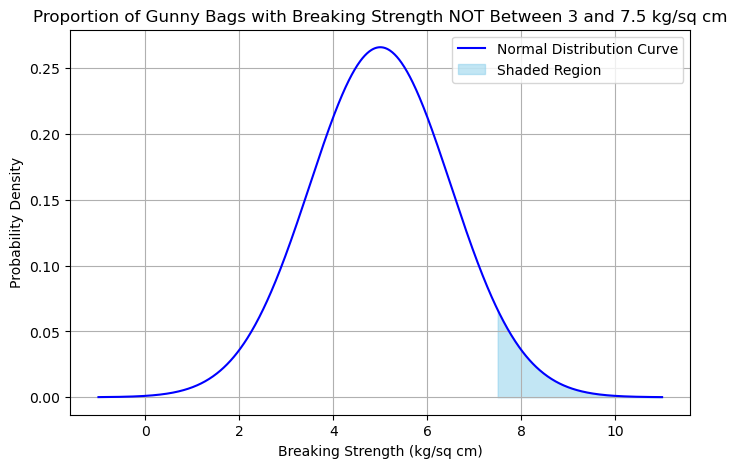

---------------------------------------------------------------------------
Column Names: Index(['unpolished', 'treated and polished'], dtype='object')
Mean hardness of unpolished stones: 134.11
3.1 Hypothesis Test for Unpolished Stones:
T-statistic: -4.165, P-value: 0.000
Reject the null hypothesis. The unpolished stones may not be suitable for printing.

3.2 Hypothesis Test for Polished vs Unpolished Stones:
T-statistic: -3.242, P-value: 0.001
Reject the null hypothesis. The mean hardness of polished and unpolished stones is different.
---------------------------------------------------------------------------------------

4.1 ANOVA Test for Hardness based on Dentists:
                  sum_sq    df         F    PR(>F)
C(Dentist)  1.577946e+05   4.0  1.934537  0.112066
Residual    1.733301e+06  85.0       NaN       NaN

4.2 ANOVA Test for Hardness based on Methods:
                 sum_sq    df         F        PR(>F)
C(Method)  5.934275e+05   2.0  19.89268  7.683892e-08
Residual   1

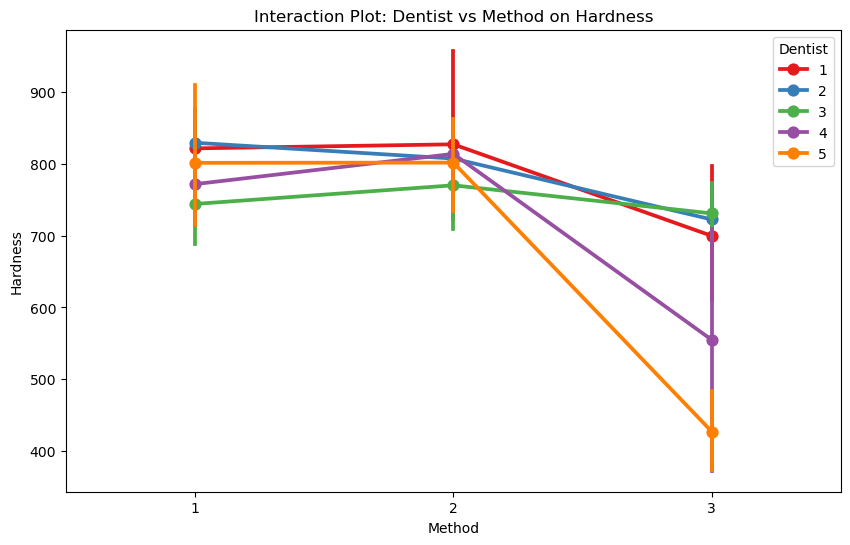


4.4 ANOVA Test for Hardness based on Dentists and Methods together:
                             sum_sq    df          F        PR(>F)
C(Dentist)            157794.555556   4.0   3.550086  1.045384e-02
C(Method)             593427.488889   2.0  26.702047  1.750208e-09
C(Dentist):C(Method)  306471.844444   8.0   3.447526  1.969515e-03
Residual              833401.666667  75.0        NaN           NaN


In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind, norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1: Football Team Injury Data

# Given data
players_injured = 145
players_total = 235
forwards_total = 94
wingers_total = 29
strikers_injured = 45
total_injured = 145

# 1.1 Probability that a randomly chosen player would suffer an injury
p_injury = players_injured / players_total

# 1.2 Probability that a player is a forward or a winger
p_forward_or_winger = (forwards_total + wingers_total) / players_total

# 1.3 Probability that a randomly chosen player plays as a striker and has a foot injury
p_striker_and_injury = strikers_injured / players_total

# 1.4 Probability that a randomly chosen injured player is a striker
p_striker_given_injury = strikers_injured / total_injured

# Print results for Problem 1
print(f"1.1 Probability of injury: {p_injury:.3f}")
print(f"1.2 Probability of being a forward or a winger: {p_forward_or_winger:.3f}")
print(f"1.3 Probability of being a striker and injured: {p_striker_and_injury:.3f}")
print(f"1.4 Probability of being a striker given injury: {p_striker_given_injury:.3f}")

print ('---------------------------------------------------------------------------')

# Problem 2: Gunny Bag Breaking Strength

# Given mean and standard deviation for the normal distribution
mean_strength = 5  # kg per sq. cm
std_dev_strength = 1.5  # kg per sq. cm

# 2.1 Proportion of gunny bags with breaking strength less than 3.17
p_less_than_3_17 = norm.cdf(3.17, mean_strength, std_dev_strength)

# 2.2 Proportion of gunny bags with breaking strength at least 3.6
p_at_least_3_6 = 1 - norm.cdf(3.6, mean_strength, std_dev_strength)

# 2.3 Proportion of gunny bags with breaking strength between 5 and 5.5
p_between_5_and_5_5 = norm.cdf(5.5, mean_strength, std_dev_strength) - norm.cdf(5, mean_strength, std_dev_strength)

# 2.4 Proportion of gunny bags with breaking strength NOT between 3 and 7.5
p_not_between_3_and_7_5 = 1 - (norm.cdf(7.5, mean_strength, std_dev_strength) - norm.cdf(3, mean_strength, std_dev_strength))

# Print results for Problem 2
print(f"2.1 Proportion with breaking strength less than 3.17 kg/cm^2: {p_less_than_3_17:.3f}")
print(f"2.2 Proportion with breaking strength at least 3.6 kg/cm^2: {p_at_least_3_6:.3f}")
print(f"2.3 Proportion with breaking strength between 5 and 5.5 kg/cm^2: {p_between_5_and_5_5:.3f}")
print(f"2.4 Proportion with breaking strength NOT between 3 and 7.5 kg/cm^2: {p_not_between_3_and_7_5:.3f}")

def plot_normal_distribution(x_start, x_end, title, x_label, shade_region=None):
    # Define x values for plotting the normal curve
    x = np.linspace(mean_strength - 4*std_dev_strength, mean_strength + 4*std_dev_strength, 1000)
    y = norm.pdf(x, mean_strength, std_dev_strength)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label="Normal Distribution Curve", color='blue')

    if shade_region:
        x_shade = np.linspace(shade_region[0], shade_region[1], 1000)
        y_shade = norm.pdf(x_shade, mean_strength, std_dev_strength)
        plt.fill_between(x_shade, y_shade, color='skyblue', alpha=0.5, label='Shaded Region')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend()
    plt.show()

# 2.1 Proportion of gunny bags with breaking strength less than 3.17 kg/sq cm
plot_normal_distribution(
    x_start=mean_strength - 4*std_dev_strength,
    x_end=mean_strength + 4*std_dev_strength,
    title="Proportion of Gunny Bags with Breaking Strength < 3.17 kg/sq cm",
    x_label="Breaking Strength (kg/sq cm)",
    shade_region=(mean_strength - 4*std_dev_strength, 3.17)  # Shading from left tail to 3.17
)

# 2.2 Proportion of gunny bags with breaking strength greater than or equal to 3.6 kg/sq cm
plot_normal_distribution(
    x_start=mean_strength - 4*std_dev_strength,
    x_end=mean_strength + 4*std_dev_strength,
    title="Proportion of Gunny Bags with Breaking Strength >= 3.6 kg/sq cm",
    x_label="Breaking Strength (kg/sq cm)",
    shade_region=(3.6, mean_strength + 4*std_dev_strength)  # Shading from 3.6 to the right tail
)

# 2.3 Proportion of gunny bags with breaking strength between 5 and 5.5 kg/sq cm
plot_normal_distribution(
    x_start=mean_strength - 4*std_dev_strength,
    x_end=mean_strength + 4*std_dev_strength,
    title="Proportion of Gunny Bags with Breaking Strength Between 5 and 5.5 kg/sq cm",
    x_label="Breaking Strength (kg/sq cm)",
    shade_region=(5, 5.5)  # Shading between 5 and 5.5
)

# 2.4 Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg/sq cm
# This means we'll shade the areas below 3 and above 7.5
plot_normal_distribution(
    x_start=mean_strength - 4*std_dev_strength,
    x_end=mean_strength + 4*std_dev_strength,
    title="Proportion of Gunny Bags with Breaking Strength NOT Between 3 and 7.5 kg/sq cm",
    x_label="Breaking Strength (kg/sq cm)",
    shade_region=(mean_strength - 4*std_dev_strength, 3)  # First shading: below 3
)

# Second plot for shading above 7.5
plot_normal_distribution(
    x_start=mean_strength - 4*std_dev_strength,
    x_end=mean_strength + 4*std_dev_strength,
    title="Proportion of Gunny Bags with Breaking Strength NOT Between 3 and 7.5 kg/sq cm",
    x_label="Breaking Strength (kg/sq cm)",
    shade_region=(7.5, mean_strength + 4*std_dev_strength)  # Second shading: above 7.5
)

print ('---------------------------------------------------------------------------')

### Problem 3: Zingaro Stone Printing

# Load Zingaro data
zingaro_data = pd.read_csv('Zingaro_Company.csv')

# Clean up the column names by stripping any potential whitespace and converting to lowercase
zingaro_data.columns = zingaro_data.columns.str.strip().str.lower()

# Verify column names to use the correct column names for unpolished and polished
print("Column Names:", zingaro_data.columns)

# 3.1 Hypothesis Test for Unpolished Stones
# Null Hypothesis: Mean hardness of unpolished stones = 150
# Alternative Hypothesis: Mean hardness of unpolished stones < 150

unpolished_mean = zingaro_data['unpolished'].mean()  # Replace with the correct column name if necessary
print(f"Mean hardness of unpolished stones: {unpolished_mean:.2f}")

# One-sample t-test (testing if unpolished stones have a mean hardness less than 150)
t_statistic_3_1, p_value_3_1 = ttest_1samp(zingaro_data['unpolished'], 150, alternative='less')

print(f"3.1 Hypothesis Test for Unpolished Stones:")
print(f"T-statistic: {t_statistic_3_1:.3f}, P-value: {p_value_3_1:.3f}")
if p_value_3_1 < 0.05:
    print("Reject the null hypothesis. The unpolished stones may not be suitable for printing.")
else:
    print("Fail to reject the null hypothesis. The unpolished stones are suitable for printing.")

# 3.2 Hypothesis Test for Mean Hardness of Polished vs Unpolished Stones
# Null Hypothesis: Mean hardness of polished stones = Mean hardness of unpolished stones
# Alternative Hypothesis: Mean hardness of polished stones ≠ Mean hardness of unpolished stones

# Two-sample t-test
polished_col = 'treated and polished'  # Adjust the column name accordingly if needed
t_statistic_3_2, p_value_3_2 = ttest_ind(zingaro_data['unpolished'], zingaro_data[polished_col])

print(f"\n3.2 Hypothesis Test for Polished vs Unpolished Stones:")
print(f"T-statistic: {t_statistic_3_2:.3f}, P-value: {p_value_3_2:.3f}")
if p_value_3_2 < 0.05:
    print("Reject the null hypothesis. The mean hardness of polished and unpolished stones is different.")
else:
    print("Fail to reject the null hypothesis. The mean hardness of polished and unpolished stones is the same.")

print ('---------------------------------------------------------------------------------------')

### Problem 4: Dental Hardness Data

dental_data = pd.read_excel('C:/Users/ARPIT SING/Documents/Dental+Hardness+data.xlsx')


# 4.1 Test how hardness varies depending on dentists (ANOVA)
model_4_1 = ols('Hardness ~ C(Dentist)', data=dental_data).fit()
anova_4_1 = sm.stats.anova_lm(model_4_1, typ=2)

print(f"\n4.1 ANOVA Test for Hardness based on Dentists:")
print(anova_4_1)

# 4.2 Test how hardness varies depending on methods (ANOVA)
model_4_2 = ols('Hardness ~ C(Method)', data=dental_data).fit()
anova_4_2 = sm.stats.anova_lm(model_4_2, typ=2)

print(f"\n4.2 ANOVA Test for Hardness based on Methods:")
print(anova_4_2)

# 4.3 Interaction effect between dentist and method (Interaction Plot)
interaction_model = ols('Hardness ~ C(Dentist) * C(Method)', data=dental_data).fit()
anova_interaction = sm.stats.anova_lm(interaction_model, typ=2)

print(f"\n4.3 ANOVA Test for Interaction between Dentist and Method:")
print(anova_interaction)

# Plot interaction effect
plt.figure(figsize=(10, 6))
sns.pointplot(data=dental_data, x='Method', y='Hardness', hue='Dentist', palette='Set1')
plt.title('Interaction Plot: Dentist vs Method on Hardness')
plt.show()

# 4.4 Test how hardness varies depending on dentists and methods together (ANOVA)
model_4_4 = ols('Hardness ~ C(Dentist) * C(Method)', data=dental_data).fit()
anova_4_4 = sm.stats.anova_lm(model_4_4, typ=2)

print(f"\n4.4 ANOVA Test for Hardness based on Dentists and Methods together:")
print(anova_4_4)
